## Imports

In [1]:
import os 
import cv2
import tensorflow.keras as keras
import tensorflow.keras.layers as layer
import numpy as np

## Load data

In [2]:
mnist_path = 'C:/Users/gurau/Desktop/Jupyter_Lab/3. Computer Vision/MNIST/mnist-png'

def load_data(data, folder_path):
    data_path = os.path.join(folder_path, data)
    images, labels = [], []
    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            images.append(img)
            labels.append(int(label))
    return np.array(images), np.array(labels)

In [3]:
train_i, train_l = load_data('train', mnist_path)
test_i, test_l = load_data('test', mnist_path)

## Preprocessing

In [4]:
train_i, test_i = train_i.reshape(-1, 28*28).astype('float32'), test_i.reshape(-1, 28*28).astype('float32')
train_i, test_i = train_i / 255., test_i / 255.

### Shuffle and Split training data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
train_X, train_y = shuffle(train_i, train_l, random_state=42)

In [6]:
train_X.shape, train_y.shape

((60000, 784), (60000,))

## Artificial Neural Network structure:

In [7]:
def ANN_MODEL(in_shape):
    model = keras.Sequential(name='MNIST_ANN')
    
    model.add(layer.Input(shape=(in_shape,)))

    model.add(layer.Dense(128, activation='relu'))
    model.add(layer.Dense(64, activation= 'relu'))
    
    model.add(layer.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [8]:
ann_model =  ANN_MODEL(train_i.shape[1])
ann_model.summary()

Model: "MNIST_ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = ann_model.fit(train_X, train_y, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8113 - loss: 0.6714 - val_accuracy: 0.9475 - val_loss: 0.1821
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.1681 - val_accuracy: 0.9593 - val_loss: 0.1371
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1124 - val_accuracy: 0.9641 - val_loss: 0.1192
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0805 - val_accuracy: 0.9709 - val_loss: 0.0974
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.0608 - val_accuracy: 0.9739 - val_loss: 0.0863
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9857 - loss: 0.0486 - val_accuracy: 0.9704 - val_loss: 0.0983
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0387 - val_accuracy: 0.9743 - val_loss: 0.0858
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9922 - loss: 0.0299 - val_accuracy: 0.

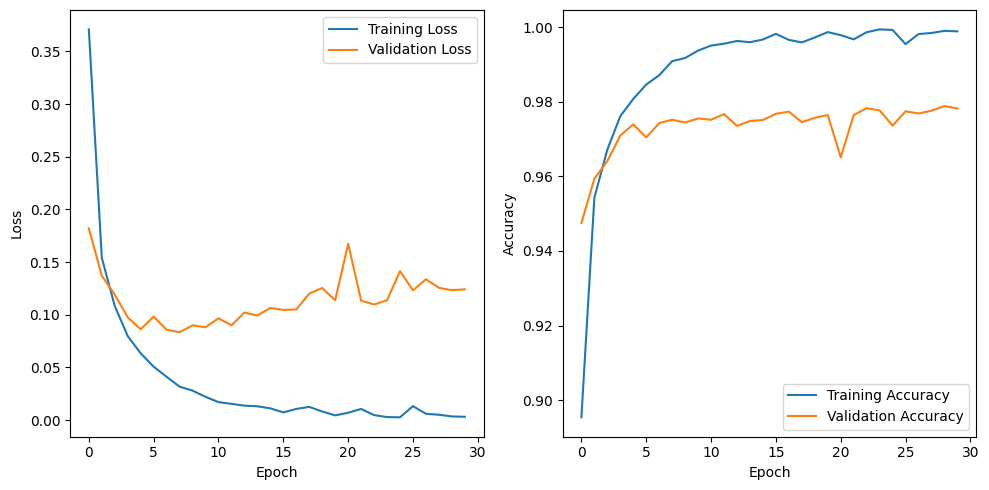

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
ann_model.evaluate(test_i, test_l)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9835 - loss: 0.0771


[0.10527127981185913, 0.9775999784469604]